# Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import time
from datetime import time

from sklearn.preprocessing import MinMaxScaler #map min value to 0 and max value to 1
from sklearn.preprocessing import StandardScaler #for each value it will subtract the mean value, shifts the axis, and the ..
from sklearn.model_selection import train_test_split
import scipy.stats as st

from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
# To make run all you ask in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Preliminary data exploration

In [2]:
data_water= pd.read_csv("/Users/deshdeepak/ironhack/UNHCR/new_data/drinking_water.csv")
data_sanitation = pd.read_csv("/Users/deshdeepak/ironhack/UNHCR/new_data/sanitation.csv")
data_asylum = pd.read_excel("/Users/deshdeepak/ironhack/UNHCR/new_data/asylum_applications-2.xlsx")
data_refugees = pd.read_excel("/Users/deshdeepak/ironhack/UNHCR/new_data/demographics2.xlsx")
voice= pd.read_excel("/Users/deshdeepak/ironhack/UNHCR/new_data/Voice.xlsx")
political=pd.read_excel("/Users/deshdeepak/ironhack/UNHCR/new_data/Political.xlsx")
government=pd.read_excel("/Users/deshdeepak/ironhack/UNHCR/new_data/Government.xlsx")
regulatory= pd.read_excel("/Users/deshdeepak/ironhack/UNHCR/new_data/Regulatory.xlsx")
rule=pd.read_excel("/Users/deshdeepak/ironhack/UNHCR/new_data/Rule of Law.xlsx")
corruption=pd.read_excel("/Users/deshdeepak/ironhack/UNHCR/new_data/Control of Corruption.xlsx")
vih= pd.read_excel("/Users/deshdeepak/ironhack/UNHCR/new_data/VIH.xlsx")
intestinal= pd.read_excel("/Users/deshdeepak/ironhack/UNHCR/new_data/intestinal.xlsx")


In [3]:
data_water.shape
data_sanitation.shape
data_asylum.shape
data_refugees.shape
voice.shape
political.shape
government.shape
regulatory.shape
rule.shape
corruption.shape
vih.shape
intestinal.shape

(3774, 8)

(3828, 8)

(13400, 3)

(9577, 3)

(864, 3)

(864, 3)

(864, 3)

(864, 3)

(864, 3)

(864, 3)

(880, 3)

(864, 3)

In [4]:
data_water.info()
data_sanitation.info()
data_asylum.info()
data_refugees.info()
voice.info()
political.info()
government.info()
regulatory.info()
rule.info()
corruption.info()
vih.info()
intestinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ISO3            3774 non-null   object 
 1   Country         3774 non-null   object 
 2   Residence Type  3774 non-null   object 
 3   Service Type    3774 non-null   object 
 4   Year            3774 non-null   int64  
 5   Coverage        3774 non-null   float64
 6   Population      3774 non-null   float64
 7   Service level   3774 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 236.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ISO3            3828 non-null   object 
 1   Country         3828 non-null   object 
 2   Residence Type  3828 non-null   object 
 3   Service Type    3828 non-null   object 
 4  

In [5]:
data_water = data_water.rename(columns={'Coverage':'water_coverage','Population':'water_population'})
data_sanitation= data_sanitation.rename(columns={'Coverage':'sanitation_coverage','Population':'sanitation_population'})


data_water.columns = data_water.columns.str.replace(' ','_')
data_water.columns = data_water.columns.str.lower()

data_sanitation.columns = data_sanitation.columns.str.replace(' ','_')
data_sanitation.columns = data_sanitation.columns.str.lower()

data_asylum.columns = data_asylum.columns.str.replace(' ','_')
data_asylum.columns = data_asylum.columns.str.lower()

data_refugees.columns = data_refugees.columns.str.replace(' ','_')
data_refugees.columns = data_refugees.columns.str.lower()

voice.columns = voice.columns.str.replace(' ','_')
voice.columns = voice.columns.str.lower()

government.columns = government.columns.str.replace(' ','_')
government.columns = government.columns.str.lower()

political.columns = political.columns.str.replace(' ','_')
political.columns = political.columns.str.lower()

regulatory.columns = regulatory.columns.str.replace(' ','_')
regulatory.columns = regulatory.columns.str.lower()

rule.columns = rule.columns.str.replace(' ','_')
rule.columns = rule.columns.str.lower()

corruption.columns = corruption.columns.str.replace(' ','_')
corruption.columns = corruption.columns.str.lower()

vih.columns = vih.columns.str.replace(' ','_')
vih.columns = vih.columns.str.lower()

intestinal.columns = intestinal.columns.str.replace(' ','_')
intestinal.columns = intestinal.columns.str.lower()

In [6]:
data_water = data_water.drop(['iso3','residence_type','service_type'], axis = 1)
data_sanitation = data_sanitation.drop(['iso3','residence_type','service_type'], axis = 1)

In [7]:
data1 = pd.merge(left = data_water, #this is a table
                                 right = data_sanitation, #this is a table
                                 how = 'right',  #how do we merge
                                 left_on = ["country","year","service_level"], 
                                 right_on= ["country","year","service_level"])

In [8]:
data_asylum= data_asylum.groupby(by=['country_of_origin','year']).agg({'applied':sum}).reset_index()
data_refugees= data_refugees.groupby(by=['country_of_origin','year']).agg({'total':sum}).reset_index()


In [9]:
data = pd.merge(left = voice, #this is a table
                                 right = political, #this is a table
                                 how = 'inner',  #how do we merge
                                 left_on = ["country","year"], 
                                 right_on= ["country","year"])

data2 = pd.merge(left = data, #this is a table
                                 right = government, #this is a table
                                 how = 'inner',  #how do we merge
                                 left_on = ["country","year"], 
                                 right_on= ["country","year"])
data3 = pd.merge(left = data2, #this is a table
                                 right = regulatory, #this is a table
                                 how = 'inner',  #how do we merge
                                 left_on = ["country","year"], 
                                 right_on= ["country","year"])
data4 = pd.merge(left = data3, #this is a table
                                 right = rule, #this is a table
                                 how = 'inner',  #how do we merge
                                 left_on = ["country","year"], 
                                 right_on= ["country","year"])
data5 = pd.merge(left = data4, #this is a table
                                 right = corruption, #this is a table
                                 how = 'inner',  #how do we merge
                                 left_on = ["country","year"], 
                                 right_on= ["country","year"])

data6 = pd.merge(left = data5, #this is a table
                                 right = data_asylum, #this is a table
                                 how = 'inner',  #how do we merge
                                 left_on = ["country","year"], 
                                 right_on= ["country_of_origin","year"])

data7 = pd.merge(left = data6, #this is a table
                                 right = data_refugees, #this is a table
                                 how = 'inner',  #how do we merge
                                 left_on = ["country","year"], 
                                 right_on= ["country_of_origin","year"])

data8 = pd.merge(left = data7, #this is a table
                                 right = vih, #this is a table
                                 how = 'inner',  #how do we merge
                                 left_on = ["country","year"], 
                                 right_on= ["location_name","year"])

data9 = pd.merge(left = data8, #this is a table
                                 right = intestinal, #this is a table
                                 how = 'inner',  #how do we merge
                                 left_on = ["country","year"], 
                                 right_on= ["location_name","year"])

data10 = pd.merge(left = data1, #this is a table
                                 right = data9, #this is a table
                                 how = 'inner',  #how do we merge
                                 left_on = ["country","year"], 
                                 right_on= ["country","year"])


In [10]:
data10.head(20)

,country,year,water_coverage,water_population,service_level,sanitation_coverage,sanitation_population,voice_and_accountability_,political_stability_and_absence_of_violence,government_,...,rule_of_law,control_of_corruption,country_of_origin_x,applied,country_of_origin_y,total,location_name_x,val_x,location_name_y,val_y
0,Angola,2002,43.37680,7.622452e+06,At least basic,30.42247,5.346033e+06,12.935324,9.523809,8.163265,...,2.970297,6.565657,Angola,5758,Angola,15744,Angola,8796.521342,Angola,171.346316
1,Angola,2002,20.01438,3.517056e+06,Limited service,12.41406,2.181480e+06,12.935324,9.523809,8.163265,...,2.970297,6.565657,Angola,5758,Angola,15744,Angola,8796.521342,Angola,171.346316
2,Angola,2002,NaN,NaN,Open defecation,39.95439,7.021044e+06,12.935324,9.523809,8.163265,...,2.970297,6.565657,Angola,5758,Angola,15744,Angola,8796.521342,Angola,171.346316
3,Angola,2002,9.14162,1.606424e+06,Unimproved,17.20908,3.024091e+06,12.935324,9.523809,8.163265,...,2.970297,6.565657,Angola,5758,Angola,15744,Angola,8796.521342,Angola,171.346316
4,Angola,2003,44.36387,8.075720e+06,At least basic,31.85606,5.798876e+06,10.945273,19.597990,9.183674,...,4.455446,5.555555,Angola,4035,Angola,14057,Angola,9819.589107,Angola,164.473562
5,Angola,2003,19.40718,3.532760e+06,Limited service,12.98003,2.362802e+06,10.945273,19.597990,9.183674,...,4.455446,5.555555,Angola,4035,Angola,14057,Angola,9819.589107,Angola,164.473562
6,Angola,2003,NaN,NaN,Open defecation,38.48665,7.005867e+06,10.945273,19.597990,9.183674,...,4.455446,5.555555,Angola,4035,Angola,14057,Angola,9819.589107,Angola,164.473562
7,Angola,2003,9.67336,1.760877e+06,Unimproved,16.67727,3.035825e+06,10.945273,19.597990,9.183674,...,4.455446,5.555555,Angola,4035,Angola,14057,Angola,9819.589107,Angola,164.473562
8,Angola,2004,45.35134,8.555854e+06,At least basic,33.29039,6.280471e+06,11.538462,16.504854,6.403941,...,5.741627,7.804878,Angola,4004,Angola,11940,Angola,10853.375345,Angola,166.662138
9,Angola,2004,18.79056,3.544974e+06,Limited service,13.55016,2.556334e+06,11.538462,16.504854,6.403941,...,5.741627,7.804878,Angola,4004,Angola,11940,Angola,10853.375345,Angola,166.662138


In [11]:
data10.columns

Index(['country', 'year', 'water_coverage', 'water_population',
       'service_level', 'sanitation_coverage', 'sanitation_population',
       'voice_and_accountability_',
       'political_stability_and_absence_of_violence', 'government_',
       'regulatory_quality', 'rule_of_law', 'control_of_corruption',
       'country_of_origin_x', 'applied', 'country_of_origin_y', 'total',
       'location_name_x', 'val_x', 'location_name_y', 'val_y'],
      dtype='object')

In [12]:
data= data10.drop(['country_of_origin_x','country_of_origin_y','location_name_x','location_name_y'],axis=1)
data.head()
#### Rename columns

,country,year,water_coverage,water_population,service_level,sanitation_coverage,sanitation_population,voice_and_accountability_,political_stability_and_absence_of_violence,government_,regulatory_quality,rule_of_law,control_of_corruption,applied,total,val_x,val_y
0,Angola,2002,43.37680,7.622452e+06,At least basic,30.42247,5.346033e+06,12.935324,9.523809,8.163265,6.632653,2.970297,6.565657,5758,15744,8796.521342,171.346316
1,Angola,2002,20.01438,3.517056e+06,Limited service,12.41406,2.181480e+06,12.935324,9.523809,8.163265,6.632653,2.970297,6.565657,5758,15744,8796.521342,171.346316
2,Angola,2002,NaN,NaN,Open defecation,39.95439,7.021044e+06,12.935324,9.523809,8.163265,6.632653,2.970297,6.565657,5758,15744,8796.521342,171.346316
3,Angola,2002,9.14162,1.606424e+06,Unimproved,17.20908,3.024091e+06,12.935324,9.523809,8.163265,6.632653,2.970297,6.565657,5758,15744,8796.521342,171.346316
4,Angola,2003,44.36387,8.075720e+06,At least basic,31.85606,5.798876e+06,10.945273,19.597990,9.183674,11.224490,4.455446,5.555555,4035,14057,9819.589107,164.473562


In [13]:
data = data[data['service_level']== 'Limited service']
data.head()
data.shape
data.to_csv('datav1.csv')

,country,year,water_coverage,water_population,service_level,sanitation_coverage,sanitation_population,voice_and_accountability_,political_stability_and_absence_of_violence,government_,regulatory_quality,rule_of_law,control_of_corruption,applied,total,val_x,val_y
1,Angola,2002,20.01438,3.517056e+06,Limited service,12.41406,2.181480e+06,12.935324,9.523809,8.163265,6.632653,2.970297,6.565657,5758,15744,8796.521342,171.346316
5,Angola,2003,19.40718,3.532760e+06,Limited service,12.98003,2.362802e+06,10.945273,19.597990,9.183674,11.224490,4.455446,5.555555,4035,14057,9819.589107,164.473562
9,Angola,2004,18.79056,3.544974e+06,Limited service,13.55016,2.556334e+06,11.538462,16.504854,6.403941,9.852217,5.741627,7.804878,4004,11940,10853.375345,166.662138
13,Angola,2005,18.16428,3.551578e+06,Limited service,14.12307,2.761419e+06,12.019231,21.359222,12.254902,10.294118,7.177033,7.317073,3168,12003,11756.413023,157.578053
17,Angola,2006,17.50080,3.546083e+06,Limited service,14.61931,2.962223e+06,11.538462,27.536232,5.853659,13.235294,9.090909,7.804878,2525,9807,12350.510032,144.658240


(632, 17)

In [14]:
data.isna().sum()

country                                        0
year                                           0
water_coverage                                 0
water_population                               0
service_level                                  0
sanitation_coverage                            0
sanitation_population                          0
voice_and_accountability_                      0
political_stability_and_absence_of_violence    0
government_                                    0
regulatory_quality                             0
rule_of_law                                    0
control_of_corruption                          0
applied                                        0
total                                          0
val_x                                          0
val_y                                          0
dtype: int64

# Exploratory Data Analysis

,year,water_coverage,water_population,sanitation_coverage,sanitation_population,voice_and_accountability_,political_stability_and_absence_of_violence,government_,regulatory_quality,rule_of_law,control_of_corruption,applied,total,val_x,val_y
year,1.000000,0.137700,0.121675,0.119382,0.066350,0.055185,-0.079554,-0.064726,-0.022996,0.022505,-0.018897,0.192240,0.171281,-0.121014,-0.067208
water_coverage,0.137700,1.000000,0.507689,-0.085429,-0.021375,-0.295598,-0.338546,-0.109605,-0.102242,-0.127525,-0.128403,0.097018,0.252296,-0.042667,0.002115
water_population,0.121675,0.507689,1.000000,-0.018892,0.562117,-0.133537,-0.404536,0.022546,-0.044213,-0.042942,-0.141400,0.270267,0.200820,0.291323,0.542640
sanitation_coverage,0.119382,-0.085429,-0.018892,1.000000,0.369214,0.308300,0.121478,0.044308,0.155951,0.110624,0.029175,0.075050,0.042657,0.085807,0.096317
sanitation_population,0.066350,-0.021375,0.562117,0.369214,1.000000,0.175524,-0.219056,0.083026,0.108700,0.008215,-0.055471,0.453156,0.196920,0.449685,0.838208
voice_and_accountability_,0.055185,-0.295598,-0.133537,0.308300,0.175524,1.000000,0.466933,0.598491,0.683965,0.701746,0.586537,-0.165462,-0.281488,0.310961,-0.007396
political_stability_and_absence_of_violence,-0.079554,-0.338546,-0.404536,0.121478,-0.219056,0.466933,1.000000,0.466665,0.511631,0.601173,0.532819,-0.335121,-0.337302,-0.047941,-0.264832
government_,-0.064726,-0.109605,0.022546,0.044308,0.083026,0.598491,0.466665,1.000000,0.873250,0.885759,0.826984,-0.186267,-0.267223,0.325282,-0.097589
regulatory_quality,-0.022996,-0.102242,-0.044213,0.155951,0.108700,0.683965,0.511631,0.873250,1.000000,0.873939,0.763004,-0.231386,-0.313159,0.323619,-0.085939
rule_of_law,0.022505,-0.127525,-0.042942,0.110624,0.008215,0.701746,0.601173,0.885759,0.873939,1.000000,0.864904,-0.238186,-0.308006,0.181923,-0.144901


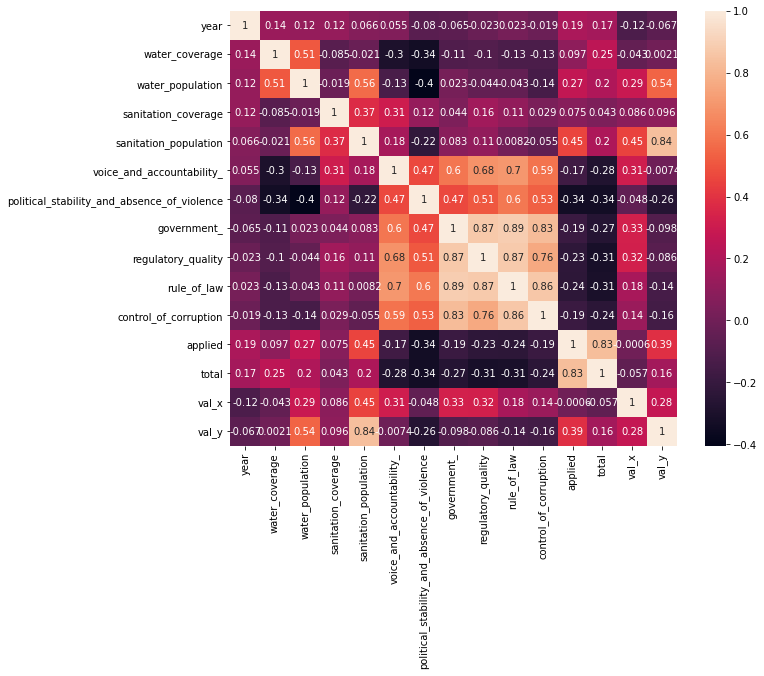

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix=data.corr(method='pearson')
corr_matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [16]:
data = data.drop(['year','country'],axis=1)

X = data.drop(['total'],axis=1)
y = data['total']

X.head(5)
y.head(5)

,water_coverage,water_population,service_level,sanitation_coverage,sanitation_population,voice_and_accountability_,political_stability_and_absence_of_violence,government_,regulatory_quality,rule_of_law,control_of_corruption,applied,val_x,val_y
1,20.01438,3.517056e+06,Limited service,12.41406,2.181480e+06,12.935324,9.523809,8.163265,6.632653,2.970297,6.565657,5758,8796.521342,171.346316
5,19.40718,3.532760e+06,Limited service,12.98003,2.362802e+06,10.945273,19.597990,9.183674,11.224490,4.455446,5.555555,4035,9819.589107,164.473562
9,18.79056,3.544974e+06,Limited service,13.55016,2.556334e+06,11.538462,16.504854,6.403941,9.852217,5.741627,7.804878,4004,10853.375345,166.662138
13,18.16428,3.551578e+06,Limited service,14.12307,2.761419e+06,12.019231,21.359222,12.254902,10.294118,7.177033,7.317073,3168,11756.413023,157.578053
17,17.50080,3.546083e+06,Limited service,14.61931,2.962223e+06,11.538462,27.536232,5.853659,13.235294,9.090909,7.804878,2525,12350.510032,144.658240


1     15744
5     14057
9     11940
13    12003
17     9807
Name: total, dtype: int64

In [17]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes('object')

X_num.head(5)
X_cat.head(5)

,water_coverage,water_population,sanitation_coverage,sanitation_population,voice_and_accountability_,political_stability_and_absence_of_violence,government_,regulatory_quality,rule_of_law,control_of_corruption,applied,val_x,val_y
1,20.01438,3.517056e+06,12.41406,2.181480e+06,12.935324,9.523809,8.163265,6.632653,2.970297,6.565657,5758,8796.521342,171.346316
5,19.40718,3.532760e+06,12.98003,2.362802e+06,10.945273,19.597990,9.183674,11.224490,4.455446,5.555555,4035,9819.589107,164.473562
9,18.79056,3.544974e+06,13.55016,2.556334e+06,11.538462,16.504854,6.403941,9.852217,5.741627,7.804878,4004,10853.375345,166.662138
13,18.16428,3.551578e+06,14.12307,2.761419e+06,12.019231,21.359222,12.254902,10.294118,7.177033,7.317073,3168,11756.413023,157.578053
17,17.50080,3.546083e+06,14.61931,2.962223e+06,11.538462,27.536232,5.853659,13.235294,9.090909,7.804878,2525,12350.510032,144.658240


,service_level
1,Limited service
5,Limited service
9,Limited service
13,Limited service
17,Limited service


In [18]:
def plot_var(df):
    col_names_d = X_num.columns.tolist()
    for i in range(len(col_names_d)):
        print('for variable',col_names_d[i])
        plt.hist(df.iloc[:,i],bins=20)
        plt.show()
        
def plot_var_box(df):
    col_names_c = df.columns.tolist()
    for i in range(len(col_names_c)):
        print('for variable',col_names_c[i])
        sns.boxplot(df.iloc[:,i])
        plt.show()
        #return df.iloc[i]
    #return plt.show()
def plot_cat(df):
    col_names_cat = X_cat.columns.tolist()
    for i in range(len(col_names_cat)):
        print('for variable',col_names_cat[i])
        plt.hist(df.iloc[:,i])
        plt.gca().set(title='Frequency Histogram', ylabel='Frequency')
        plt.show()

def plot_count_cat(df):
    col_names_cat = X_cat.columns.tolist()
    for i in range(len(col_names_cat)):
        print('for variable',col_names_cat[i])
        sns.countplot(df.iloc[:,i])
        plt.show()

for variable water_coverage


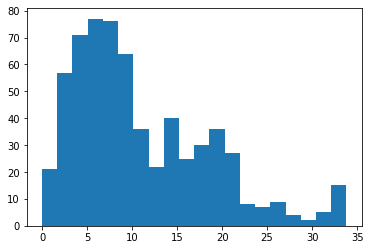

for variable water_population


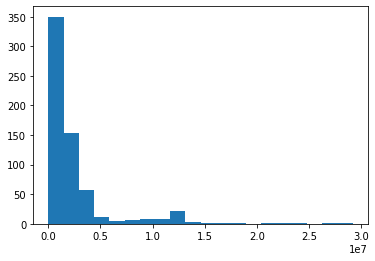

for variable sanitation_coverage


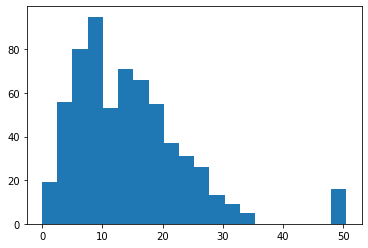

for variable sanitation_population


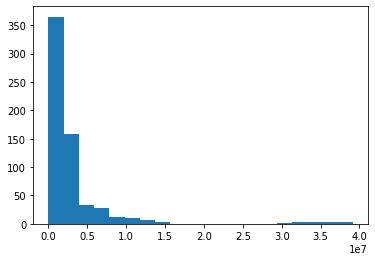

for variable voice_and_accountability_


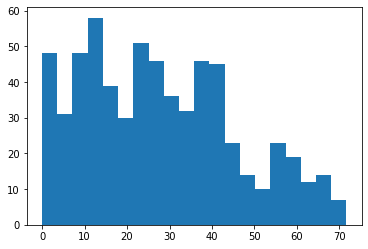

for variable political_stability_and_absence_of_violence


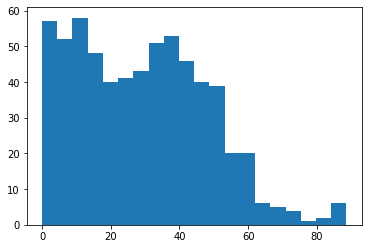

for variable government_


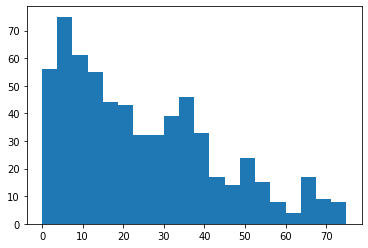

for variable regulatory_quality


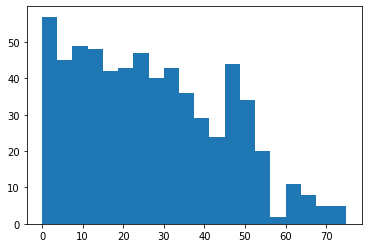

for variable rule_of_law


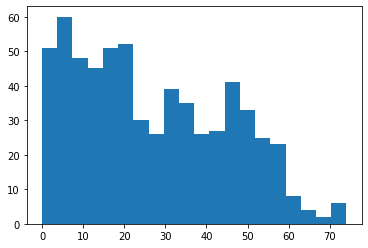

for variable control_of_corruption


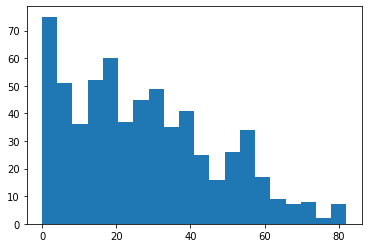

for variable applied


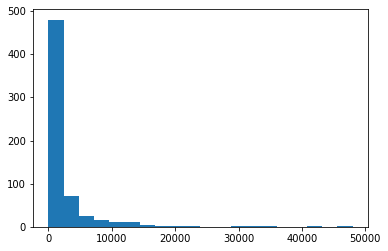

for variable val_x


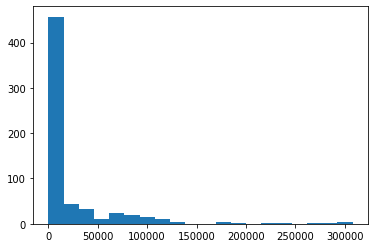

for variable val_y


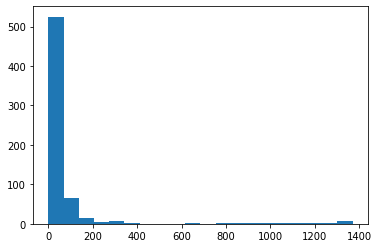

In [19]:
plot_var(X_num)

for variable service_level


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


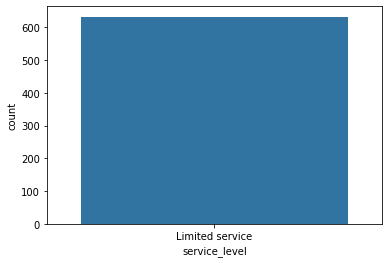

In [20]:
plot_count_cat(X_cat)

for variable water_coverage


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


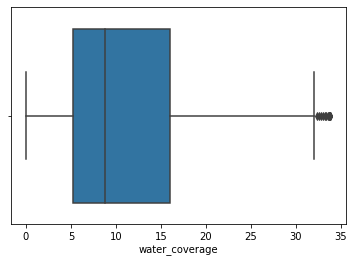

for variable water_population


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


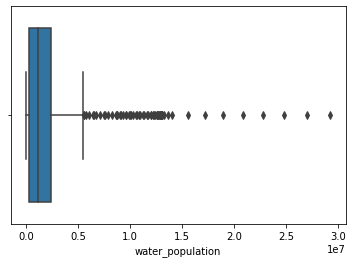

for variable sanitation_coverage


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


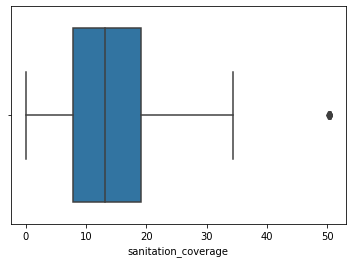

for variable sanitation_population


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


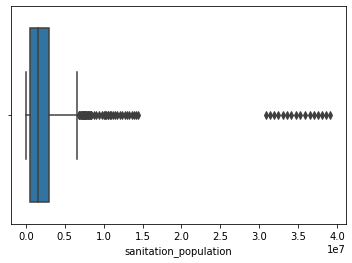

for variable voice_and_accountability_


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


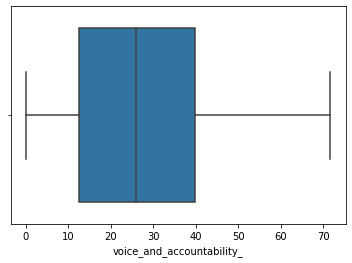

for variable political_stability_and_absence_of_violence


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


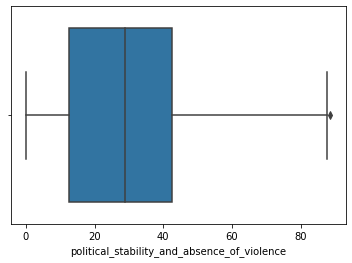

for variable government_


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


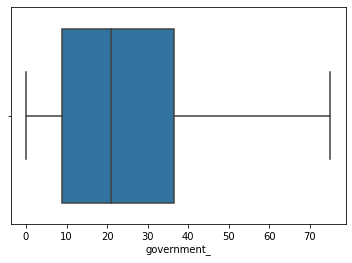

for variable regulatory_quality


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


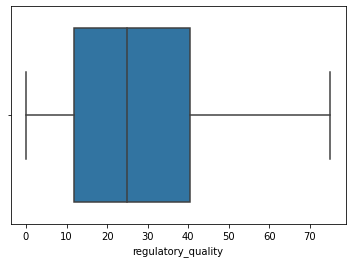

for variable rule_of_law


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


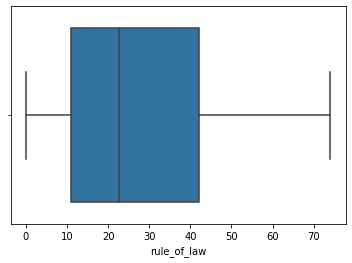

for variable control_of_corruption


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


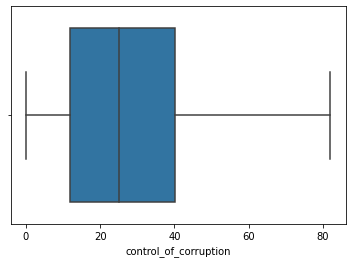

for variable applied


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


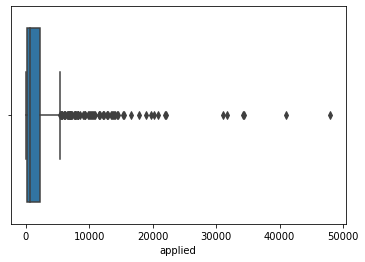

for variable val_x


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


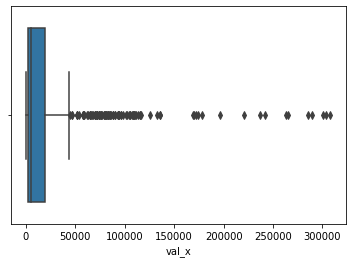

for variable val_y


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


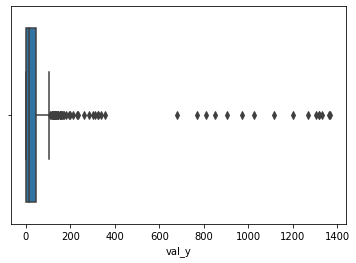

In [21]:
plot_var_box(X_num)

In [22]:
#there seems to be some outliers but they may not be errors. So we are keeping it for now.

In [24]:
#defining a function to convert variables in categorical functions

#def convert_cat(row):
    #if row < (value) &row

# Train-test split

In [25]:
X = X_num

X.head()
y.head()



,water_coverage,water_population,sanitation_coverage,sanitation_population,voice_and_accountability_,political_stability_and_absence_of_violence,government_,regulatory_quality,rule_of_law,control_of_corruption,applied,val_x,val_y
1,20.01438,3.517056e+06,12.41406,2.181480e+06,12.935324,9.523809,8.163265,6.632653,2.970297,6.565657,5758,8796.521342,171.346316
5,19.40718,3.532760e+06,12.98003,2.362802e+06,10.945273,19.597990,9.183674,11.224490,4.455446,5.555555,4035,9819.589107,164.473562
9,18.79056,3.544974e+06,13.55016,2.556334e+06,11.538462,16.504854,6.403941,9.852217,5.741627,7.804878,4004,10853.375345,166.662138
13,18.16428,3.551578e+06,14.12307,2.761419e+06,12.019231,21.359222,12.254902,10.294118,7.177033,7.317073,3168,11756.413023,157.578053
17,17.50080,3.546083e+06,14.61931,2.962223e+06,11.538462,27.536232,5.853659,13.235294,9.090909,7.804878,2525,12350.510032,144.658240


1     15744
5     14057
9     11940
13    12003
17     9807
Name: total, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [27]:
numericals_train = X_train.select_dtypes(np.number)
numericals_test = X_test.select_dtypes(np.number)
numericals_train.head()

,water_coverage,water_population,sanitation_coverage,sanitation_population,voice_and_accountability_,political_stability_and_absence_of_violence,government_,regulatory_quality,rule_of_law,control_of_corruption,applied,val_x,val_y
233,23.56693,3.905327e+06,21.28377,3.526979e+06,38.028168,27.014217,31.753555,47.393364,42.253521,37.914692,507,6064.620747,89.949472
1713,32.31689,1.297357e+07,16.90385,6.786029e+06,29.064039,20.952381,36.538460,45.673077,40.865383,13.461538,657,32733.163508,27.026676
1325,21.69482,2.461355e+06,12.95105,1.469343e+06,17.733990,35.238094,55.288460,61.057693,60.576923,75.480766,1006,4613.234409,7.336154
2124,0.00000,0.000000e+00,0.00000,0.000000e+00,9.359606,2.380952,1.923077,0.961538,1.923077,1.923077,4022,88.431545,0.290609
393,9.50990,6.883912e+04,10.40337,7.530665e+04,34.272301,33.649288,2.843602,7.582938,16.431925,23.696682,1189,19.587225,0.240710


In [28]:
transformer = StandardScaler().fit(numericals_train) #this line teaches standardscaler where points are, subtracting mean to it, and dividing by standard deviation
numericals_train_standardized = transformer.transform(numericals_train) #this line transforms based on what it learned in the previous line
numericals_test_standardized = transformer.transform(numericals_test) 
numericals_test_standardized

array([[-0.76136837, -0.08560698, -0.64107888, ...,  1.11395697,
        -0.51133168, -0.31705666],
       [-0.2366301 , -0.02074688,  3.91719631, ..., -0.20752402,
        -0.05334245, -0.23182411],
       [-0.01012369, -0.59508791, -0.16641854, ..., -0.30045693,
        -0.5208999 , -0.33273211],
       ...,
       [-0.40829475, -0.44027486,  0.32904223, ..., -0.48986504,
        -0.41291498, -0.09444543],
       [ 0.68828568,  0.31363352,  0.13805449, ..., -0.29462258,
        -0.22666314,  0.31490984],
       [-0.86146682, -0.50439625,  0.15948864, ...,  0.24859737,
        -0.40302087,  0.00735485]])

In [29]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 233 to 2129
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   water_coverage                               442 non-null    float64
 1   water_population                             442 non-null    float64
 2   sanitation_coverage                          442 non-null    float64
 3   sanitation_population                        442 non-null    float64
 4   voice_and_accountability_                    442 non-null    float64
 5   political_stability_and_absence_of_violence  442 non-null    float64
 6   government_                                  442 non-null    float64
 7   regulatory_quality                           442 non-null    float64
 8   rule_of_law                                  442 non-null    float64
 9   control_of_corruption                        442 non-null    float64
 10 

In [30]:
X_train


,water_coverage,water_population,sanitation_coverage,sanitation_population,voice_and_accountability_,political_stability_and_absence_of_violence,government_,regulatory_quality,rule_of_law,control_of_corruption,applied,val_x,val_y
233,23.56693,3.905327e+06,21.28377,3.526979e+06,38.028168,27.014217,31.753555,47.393364,42.253521,37.914692,507,6064.620747,89.949472
1713,32.31689,1.297357e+07,16.90385,6.786029e+06,29.064039,20.952381,36.538460,45.673077,40.865383,13.461538,657,32733.163508,27.026676
1325,21.69482,2.461355e+06,12.95105,1.469343e+06,17.733990,35.238094,55.288460,61.057693,60.576923,75.480766,1006,4613.234409,7.336154
2124,0.00000,0.000000e+00,0.00000,0.000000e+00,9.359606,2.380952,1.923077,0.961538,1.923077,1.923077,4022,88.431545,0.290609
393,9.50990,6.883912e+04,10.40337,7.530665e+04,34.272301,33.649288,2.843602,7.582938,16.431925,23.696682,1189,19.587225,0.240710
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2419,7.82580,1.309236e+07,21.80036,3.647142e+07,27.230047,3.317536,16.587677,26.066351,10.328638,10.900474,6882,90164.682881,973.293619
213,19.13317,2.726863e+06,15.48557,2.207007e+06,36.538460,54.589371,24.757282,46.116505,42.105263,46.601940,338,9759.536758,74.619213
1401,26.68975,1.081824e+07,8.31933,3.372101e+06,2.463054,5.714286,7.211538,4.326923,10.576923,3.365385,10441,6115.957946,14.817373
317,10.96339,2.130466e+06,18.34856,3.565592e+06,17.061611,29.857821,21.052631,24.401915,13.270143,17.224880,1469,36430.310631,32.221924


In [31]:
def func_train_test(model): #lm= list of models
    if model == 'LinearRegression':
        LR = LR = linear_model.LinearRegression()
        LR.fit(X_train,y_train)
        score = LR.score(X_test, y_test)
        y_pred= LR.predict(X_test)
        return print('R2 score of LR model is: ',r2_score(y_test, y_pred),'& score is: ',score)
    elif model == 'KNeighborsRegressor':
        KNN = KNeighborsRegressor(n_neighbors=2)
        KNN.fit(X_train, y_train)
        score = KNN.score(X_test, y_test)
        return print('KNeighborscore is: ',score)
    elif model == 'MLPRegressor':
        regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
        regr.predict(X_test)
        MLPscore = regr.score(X_test, y_test)
        return print('MLPscore is: ',MLPscore)
    else:
        return print('no model applicable')

In [32]:
func_train_test('LinearRegression')


R2 score of LR model is:  0.7612531165778466 & score is:  0.7612531165778466


In [33]:
func_train_test('KNeighborsRegressor')

KNeighborscore is:  0.569669886497047


In [34]:
func_train_test('MLPRegressor')


MLPscore is:  0.5709114812786498


In [35]:
scores = []
for k in range(2,14):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

scores

KNeighborsRegressor(n_neighbors=2)

KNeighborsRegressor(n_neighbors=3)

KNeighborsRegressor(n_neighbors=4)

KNeighborsRegressor()

KNeighborsRegressor(n_neighbors=6)

KNeighborsRegressor(n_neighbors=7)

KNeighborsRegressor(n_neighbors=8)

KNeighborsRegressor(n_neighbors=9)

KNeighborsRegressor(n_neighbors=10)

KNeighborsRegressor(n_neighbors=11)

KNeighborsRegressor(n_neighbors=12)

KNeighborsRegressor(n_neighbors=13)

[0.569669886497047,
 0.5081612016961541,
 0.46919987141825936,
 0.4563575594625848,
 0.4084561893837232,
 0.34567923566171277,
 0.30607079977866136,
 0.27508892368891047,
 0.28308338046745907,
 0.24198468358858694,
 0.22102134366126713,
 0.20188146184048372]

<Figure size 360x720 with 0 Axes>

Text(0.5, 1.0, 'accuracy scores vs. K Value')

Text(0.5, 0, 'K')

Text(0, 0.5, 'Accuracy')

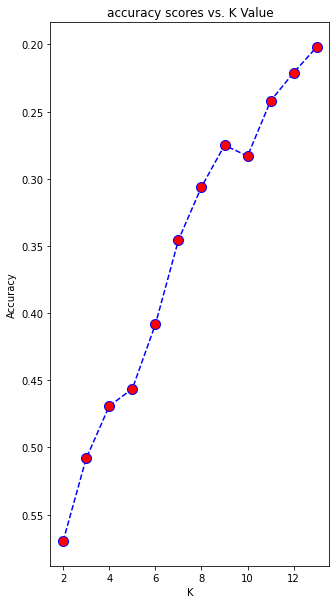

In [36]:
plt.figure(figsize=(5,10))
plt.plot(range(2,14),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.gca().invert_yaxis()
plt.xlabel('K')
plt.ylabel('Accuracy')


In [37]:
import sys
!{sys.executable} -m pip install prophet

In [38]:
from prophet import Prophet

In [39]:
import sys
!{sys.executable} -m pip install plotly
!{sys.executable} -m pip install notebook
!{sys.executable} -m pip install ipywidgets

In [40]:
data_ts = pd.read_csv("/Users/deshdeepak/ironhack/UNHCR/new_data/datav1.csv")
data_ts.head()


                      

,Unnamed: 0,country,year,water_coverage,water_population,service_level,sanitation_coverage,sanitation_population,voice_and_accountability_,political_stability_and_absence_of_violence,government_,regulatory_quality,rule_of_law,control_of_corruption,applied,total,val_x,val_y
0,1,Angola,2002,20.01438,3.517056e+06,Limited service,12.41406,2.181480e+06,12.935324,9.523809,8.163265,6.632653,2.970297,6.565657,5758,15744,8796.521342,171.346316
1,5,Angola,2003,19.40718,3.532760e+06,Limited service,12.98003,2.362802e+06,10.945273,19.597990,9.183674,11.224490,4.455446,5.555555,4035,14057,9819.589107,164.473562
2,9,Angola,2004,18.79056,3.544974e+06,Limited service,13.55016,2.556334e+06,11.538462,16.504854,6.403941,9.852217,5.741627,7.804878,4004,11940,10853.375345,166.662138
3,13,Angola,2005,18.16428,3.551578e+06,Limited service,14.12307,2.761419e+06,12.019231,21.359222,12.254902,10.294118,7.177033,7.317073,3168,12003,11756.413023,157.578053
4,17,Angola,2006,17.50080,3.546083e+06,Limited service,14.61931,2.962223e+06,11.538462,27.536232,5.853659,13.235294,9.090909,7.804878,2525,9807,12350.510032,144.658240


In [61]:
data_ts_f = data_ts[['year','total']]


data_ts_f = data_ts_f.rename(columns={'year':'ds','total':'y'})
data_ts_f.head()

,country,ds,y
0,Angola,2002,15744
1,Angola,2003,14057
2,Angola,2004,11940
3,Angola,2005,12003
4,Angola,2006,9807


In [71]:
angola = data_ts_f[data_ts_f['country']=='Angola']

In [73]:
m=Prophet()
m.fit(angola)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.


In [75]:

future = m.make_future_dataframe(periods=2,freq='YS')
future.tail()

,ds
13,1970-01-01 00:00:00.000002015
14,1970-01-01 00:00:00.000002016
15,1970-01-01 00:00:00.000002017
16,1971-01-01 00:00:00.000002017
17,1972-01-01 00:00:00.000002017


In [76]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
13,1970-01-01 00:00:00.000002015,32212.543356,30921.088302,33486.575632
14,1970-01-01 00:00:00.000002016,32212.543356,30920.140568,33426.350505
15,1970-01-01 00:00:00.000002017,32212.543356,30974.322882,33437.509056
16,1971-01-01 00:00:00.000002017,31520.594894,30190.832613,32786.542473
17,1972-01-01 00:00:00.000002017,30810.791005,29554.382619,32058.392495


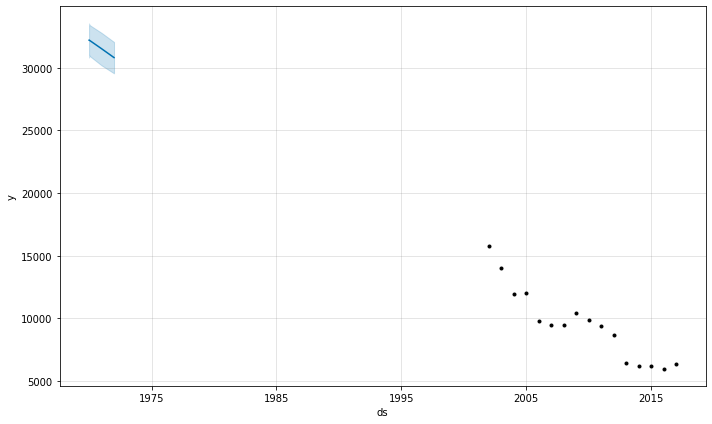

In [77]:
fig1 = m.plot(forecast)

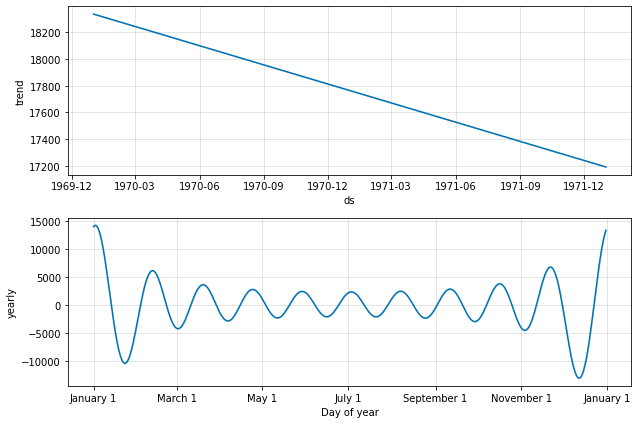

In [79]:
# Python
fig2 = m.plot_components(forecast)


In [67]:
from prophet.plot import plot_plotly, plot_components_plotly

In [68]:
import plotly.graph_objs as go


In [80]:

plot_plotly(m,forecast)

In [81]:
plot_components_plotly(m, forecast)